In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.chdir("/tf/notebooks")

In [2]:
import tensorflow as tf
from keras import optimizers, callbacks

from models import SiameseModel, init_network
from utils import load_data, visualise

In [3]:
print("Tensorflow version:", tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Tensorflow version: 2.12.0
Num GPUs Available:  1


Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.
Found 6194 files belonging to 1 classes.


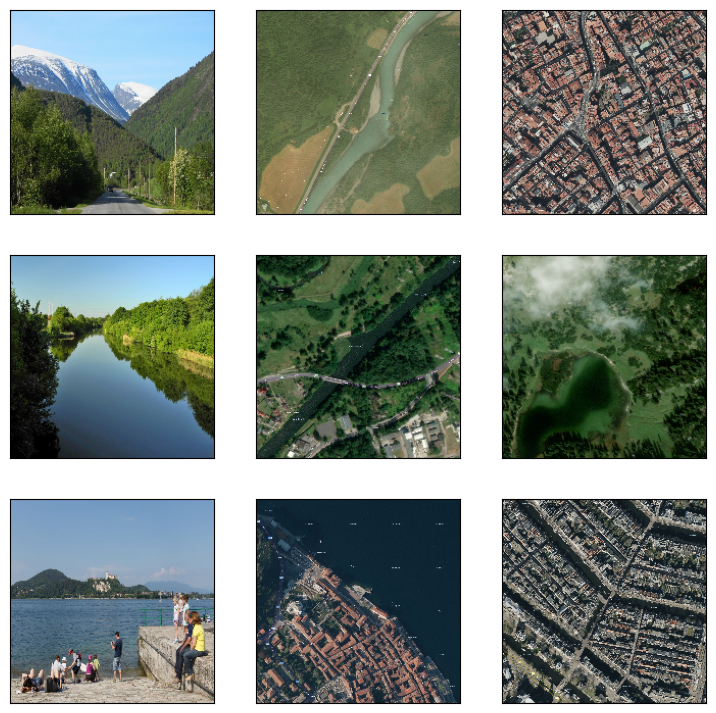

In [4]:
BATCH_SIZE = 16
train_data = load_data(anchor_images_path="/tf/CVUSA/terrestrial",
                       positive_images_path="/tf/CVUSA/satellite",
                       batch_size=BATCH_SIZE)
visualise(*list(train_data.take(1).as_numpy_iterator())[0])

In [5]:
# Checkpoint during training
network = init_network()
model = SiameseModel(network)
model.compile(optimizer=optimizers.Adam(0.001),
              weighted_metrics=[])

In [6]:
model.fit(train_data,
          epochs=1)

388/388 [==============================] - 100s 203ms/step - loss: 0.6102


In [7]:
tf.saved_model.save(model.siamese_network, "/tf/notebooks/resnet")

INFO:tensorflow:Assets written to: /tf/notebooks/resnet/assets


INFO:tensorflow:Assets written to: /tf/notebooks/resnet/assets


In [13]:
model.siamese_network.save("/tf/notebooks/resnet_2")

INFO:tensorflow:Assets written to: /tf/notebooks/resnet_2/assets


INFO:tensorflow:Assets written to: /tf/notebooks/resnet_2/assets


In [15]:
network_2 = init_network()
network_2.load_weights("/tf/notebooks/resnet_2")
model_2 = SiameseModel(network_2)
model_2.compile(optimizer=optimizers.Adam(0.001), weighted_metrics=[])
model_2.fit(train_data)

388/388 [==============================] - 95s 216ms/step - loss: 0.5004
